# Fase 3: Entrenamiento y Evaluación de Modelos Predictivos
En este notebook, implementamos algoritmos de aprendizaje supervisado para predecir el beneficio (Profit) del e-commerce. Compararemos una Regresión Lineal con un Bosque Aleatorio (Random Forest) para determinar cuál ofrece mayor precisión.

## 1. Configuración y Carga de Datos
Utilizamos el dataset generado en la fase de preprocesamiento alojado en la carpeta data/.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# Carga de datos ya procesados
df = pd.read_csv("../data/ecommerce_prepared.csv")

target = 'Profit'
X = df.drop(columns=[target])
y = df[target]

# División en conjuntos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 2. Modelo 1: Regresión Lineal
La Regresión Lineal servirá como nuestro modelo base (baseline). Nota técnica: Como los datos ya vienen preprocesados del notebook anterior, no es estrictamente necesario el uso de Pipeline aquí si solo llamamos al modelo.

In [8]:
# Inicialización y entrenamiento
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

# Predicción y Evaluación
y_pred_lin = linreg_model.fit(X_train, y_train).predict(X_test)

mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = root_mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression - MAE: {mae_lin:.2f}, RMSE: {rmse_lin:.2f}, R2: {r2_lin:.2f}")

Linear Regression - MAE: 200.59, RMSE: 297.34, R2: 0.65


## 3. Modelo 2: Random Forest Regressor
Este modelo es más complejo y capaz de capturar relaciones no lineales en los datos del e-commerce.

In [9]:
# Inicialización del modelo
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# CORRECCIÓN TÉCNICA: Es imprescindible entrenar (fit) el modelo antes de predecir
rf_model.fit(X_train, y_train)

# Predicción y Evaluación
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")

Random Forest - MAE: 213.13, RMSE: 315.63, R2: 0.61


## 4. Comparación Visual de Resultados
Para una presentación profesional, es vital incluir una comparativa visual.

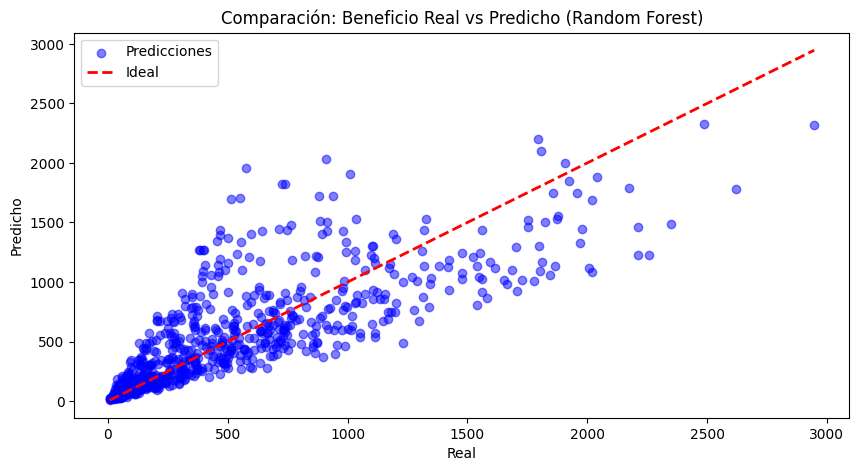

In [10]:
plt.figure(figsize=(10, 5))

# Gráfico de dispersión: Real vs Predicho para Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.title("Comparación: Beneficio Real vs Predicho (Random Forest)")
plt.xlabel("Real")
plt.ylabel("Predicho")
plt.legend()
plt.show()